In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [26]:
df = pd.read_csv("../data/Processed_us_birth.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [27]:
df

,birth_counts
date,
1969-01-01,8486
1969-01-02,9002
1969-01-03,9542
1969-01-04,8960
1969-01-05,8390
...,...
1988-12-27,11528
1988-12-28,11847
1988-12-29,11704


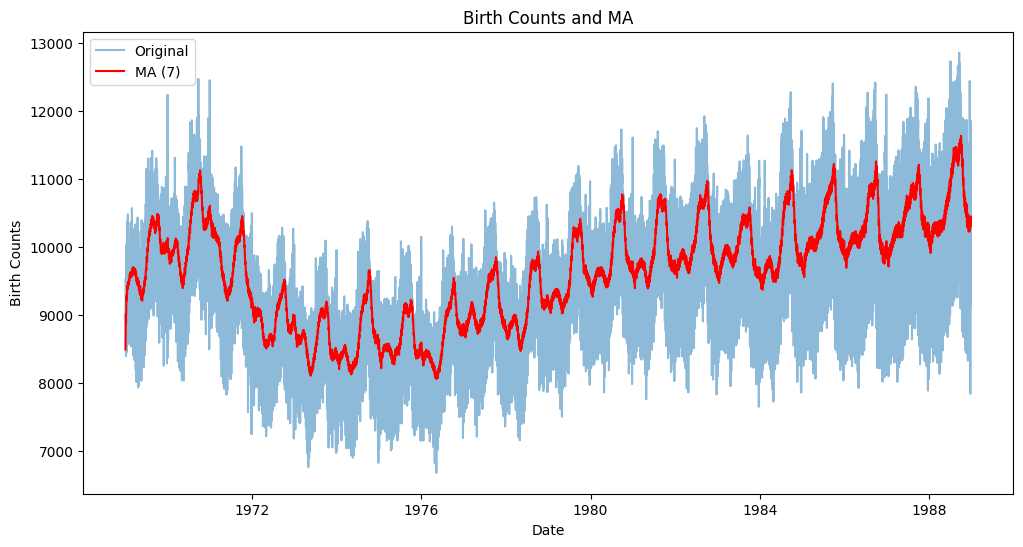

In [24]:
# 30일 이동평균 계산 (min_periods=1은 초기 부분도 계산)
df['Moving_Average'] = df['birth_counts'].rolling(window=30, min_periods=1).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['birth_counts'], label='Original', alpha=0.5)
plt.plot(df.index, df['Moving_Average'], label='MA (7)', color='red')
plt.xlabel('Date')
plt.ylabel('Birth Counts')
plt.title('Birth Counts and MA')
plt.legend()
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_46692\1404103063.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()


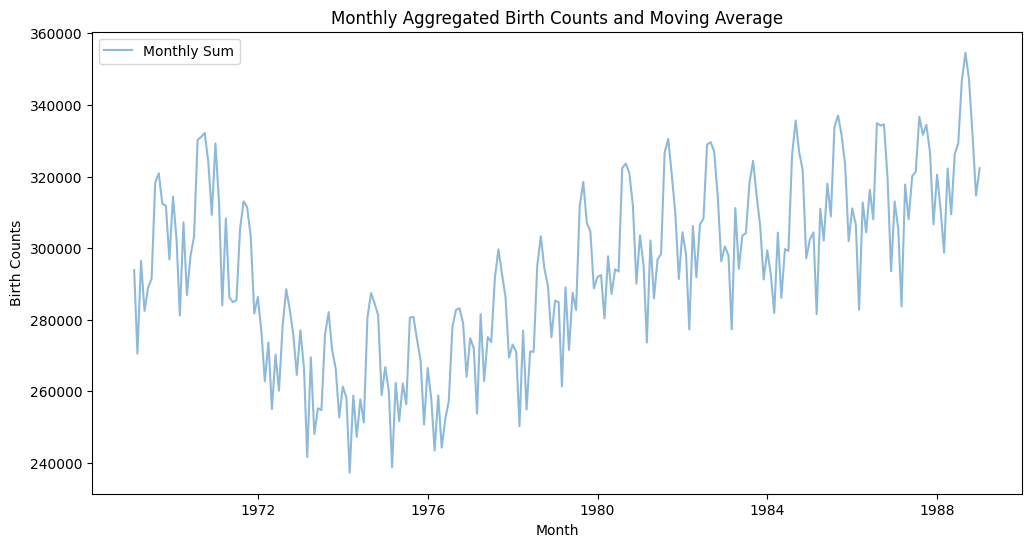

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# 월별 합계를 계산 (일별 'birth_counts'의 합계)
df_monthly = df.resample('M').sum()

# 월별 데이터에 대해 3개월 이동평균 계산 (예시로 3개월 MA 사용)
df_monthly['Moving_Average'] = df_monthly['birth_counts'].rolling(window=1, min_periods=1).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['birth_counts'], label='Monthly Sum', alpha=0.5)
plt.xlabel('Month')
plt.ylabel('Birth Counts')
plt.title('Monthly Aggregated Birth Counts and Moving Average')
plt.legend()
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_46692\3317140460.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()


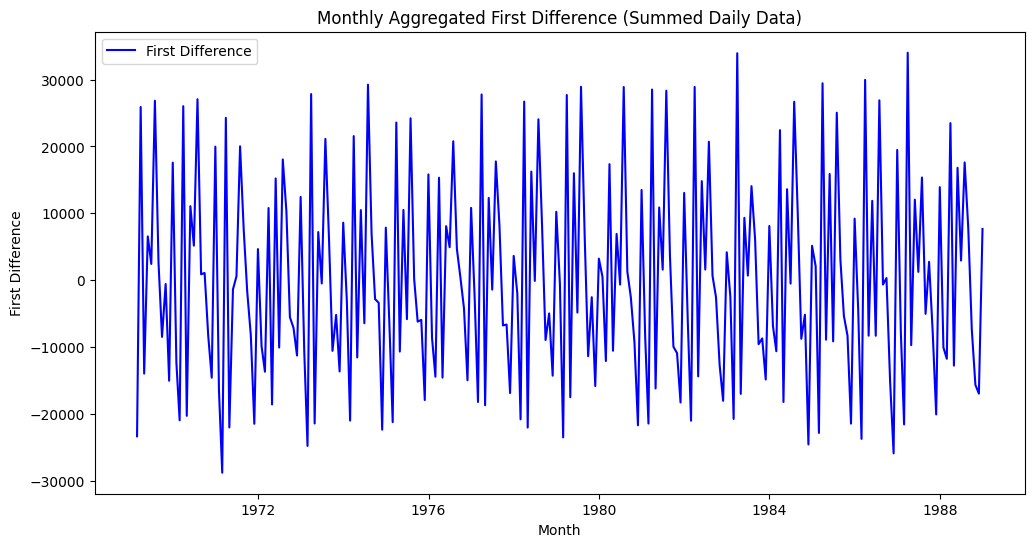

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 가정: df는 일별 데이터이며, 인덱스가 datetime이고, 'Sunspot_Count'와 같이 합산할 열이 존재한다고 가정합니다.
# 월별 합계를 계산 (트렌드가 있는 데이터의 경우, 월별 합계로 리샘플링)
df_monthly = df.resample('M').sum()

# 1차 차분 계산
diff1 = df_monthly.diff()

# 1차 차분 플롯 그리기
plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, diff1, label='First Difference', color='blue')
plt.xlabel("Month")
plt.ylabel("First Difference")
plt.title("Monthly Aggregated First Difference (Summed Daily Data)")
plt.legend()
plt.show()


In [31]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss

# 원본 시계열 준비 (NaN 보간)
series = df['birth_counts']
series = series.interpolate()

# 1차 차분 수행 (첫 번째 값은 NaN이므로 제거)
diff1 = series.diff().dropna()

print("===== 1차 차분 후 시계열 =====")
print(diff1.head())

# ----------------------------
# Augmented Dickey-Fuller (ADF) 테스트
# ----------------------------
adf_result = adfuller(diff1)
adf_stat = adf_result[0]
adf_pvalue = adf_result[1]

print("\nADF Test Results:")
print(f"ADF Statistic: {adf_stat:.4f}")
print(f"p-value: {adf_pvalue:.4f}")
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

# ADF 해석: p-value < 0.05이면 귀무가설(단위근 존재)을 기각하므로 정상(stationary)하다고 판단
if adf_pvalue < 0.05:
    print("ADF Test: p-value가 0.05보다 작으므로 1차 차분 시계열은 정상입니다.")
else:
    print("ADF Test: p-value가 0.05보다 크므로 1차 차분 시계열은 비정상입니다.")

# ----------------------------
# KPSS 테스트 (regression='c'는 상수 항을 가진 안정적인 시계열 가정)
# ----------------------------
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    print("\nKPSS Test Results:")
    print(f"KPSS Statistic: {statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"num lags: {n_lags}")
    for key, value in critical_values.items():
        print(f"Critical Value ({key}): {value:.4f}")
    return p_value

kpss_pvalue = kpss_test(diff1, regression='c')

# KPSS 해석: KPSS의 귀무가설은 정상(stationary)임. p-value < 0.05이면 귀무가설을 기각하므로 비정상으로 판단.
if kpss_pvalue < 0.05:
    print("KPSS Test: p-value가 0.05보다 작으므로 1차 차분 시계열은 비정상입니다.")
else:
    print("KPSS Test: p-value가 0.05보다 크므로 1차 차분 시계열은 정상입니다.")


===== 1차 차분 후 시계열 =====
date
1969-01-02     516.0
1969-01-03     540.0
1969-01-04    -582.0
1969-01-05    -570.0
1969-01-06    1170.0
Name: birth_counts, dtype: float64

ADF Test Results:
ADF Statistic: -16.2319
p-value: 0.0000
Critical Value (1%): -3.4313
Critical Value (5%): -2.8619
Critical Value (10%): -2.5670
ADF Test: p-value가 0.05보다 작으므로 1차 차분 시계열은 정상입니다.

KPSS Test Results:
KPSS Statistic: 0.0094
p-value: 0.1000
num lags: 79
Critical Value (10%): 0.3470
Critical Value (5%): 0.4630
Critical Value (2.5%): 0.5740
Critical Value (1%): 0.7390
KPSS Test: p-value가 0.05보다 크므로 1차 차분 시계열은 정상입니다.


C:\Users\admin\AppData\Local\Temp\ipykernel_46692\2064584044.py:38: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


In [15]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

def run_stationarity_tests(series):
    print("=== ADF 검정 결과 ===")
    adf_result = adfuller(series, autolag='AIC')
    adf_stat, adf_p, adf_lags, adf_nobs, adf_crit, adf_icbest = adf_result
    print(f"검정 통계량: {adf_stat:.4f}")
    print(f"p-value: {adf_p:.4f}")
    print(f"사용된 lag 수: {adf_lags}")
    print(f"관측치 수: {adf_nobs}")
    print("임계값:")
    for key, value in adf_crit.items():
        print(f"  {key} 유의수준: {value:.4f}")
        
    # ADF 검정의 귀무가설은 "단위근이 존재하여 시계열이 비정상이다"입니다.
    # 검정 통계량이 임계값보다 작으면 귀무가설을 기각하여 정상성을 인정함.
    if adf_stat < adf_crit["5%"]:
        adf_conclusion = "정상"
        print("=> ADF 검정 결과: 귀무가설(비정상)을 기각합니다. 시계열은 정상입니다.\n")
    else:
        adf_conclusion = "비정상"
        print("=> ADF 검정 결과: 귀무가설(비정상)을 기각하지 못했습니다. 시계열은 비정상입니다.\n")
    
    print("=== KPSS 검정 결과 ===")
    kpss_result = kpss(series, regression='c', nlags="auto")
    kpss_stat, kpss_p, kpss_lags, kpss_crit = kpss_result
    print(f"검정 통계량: {kpss_stat:.4f}")
    print(f"p-value: {kpss_p:.4f}")
    print(f"사용된 lag 수: {kpss_lags}")
    print("임계값:")
    for key, value in kpss_crit.items():
        print(f"  {key} 유의수준: {value:.4f}")
        
    # KPSS 검정의 귀무가설은 "시계열이 정상이다"입니다.
    # 검정 통계량이 각 유의수준의 임계값보다 크면 귀무가설을 기각하여 비정상으로 판단합니다.
    kpss_conclusion = "정상"
    for level, crit in kpss_crit.items():
        if kpss_stat > crit:
            kpss_conclusion = "비정상"
            print(f"{level} 유의수준: KPSS 검정 통계량이 임계값보다 큽니다. (비정상)")
        else:
            print(f"{level} 유의수준: KPSS 검정 통계량이 임계값 이하입니다. (정상)")
    
    print("\n=== 종합 결과 ===")
    print(f"ADF 검정 결론: {adf_conclusion}")
    print(f"KPSS 검정 결론: {kpss_conclusion}")
    
    if adf_conclusion == "정상" and kpss_conclusion == "정상":
        print("=> 최종 결론: 시계열은 정상입니다.")
    elif adf_conclusion == "비정상" and kpss_conclusion == "비정상":
        print("=> 최종 결론: 시계열은 비정상입니다.")
    else:
        print("=> 최종 결론: 검정 결과가 상반됩니다. 추가 분석이 필요합니다.")

# 예시 사용:
series = df
run_stationarity_tests(series)


=== ADF 검정 결과 ===
검정 통계량: -3.3516
p-value: 0.0127
사용된 lag 수: 36
관측치 수: 7268
임계값:
  1% 유의수준: -3.4313
  5% 유의수준: -2.8619
  10% 유의수준: -2.5670
=> ADF 검정 결과: 귀무가설(비정상)을 기각합니다. 시계열은 정상입니다.

=== KPSS 검정 결과 ===
검정 통계량: 5.5577
p-value: 0.0100
사용된 lag 수: 54
임계값:
  10% 유의수준: 0.3470
  5% 유의수준: 0.4630
  2.5% 유의수준: 0.5740
  1% 유의수준: 0.7390
10% 유의수준: KPSS 검정 통계량이 임계값보다 큽니다. (비정상)
5% 유의수준: KPSS 검정 통계량이 임계값보다 큽니다. (비정상)
2.5% 유의수준: KPSS 검정 통계량이 임계값보다 큽니다. (비정상)
1% 유의수준: KPSS 검정 통계량이 임계값보다 큽니다. (비정상)

=== 종합 결과 ===
ADF 검정 결론: 정상
KPSS 검정 결론: 비정상
=> 최종 결론: 검정 결과가 상반됩니다. 추가 분석이 필요합니다.


C:\Users\admin\AppData\Local\Temp\ipykernel_46692\28830998.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags="auto")


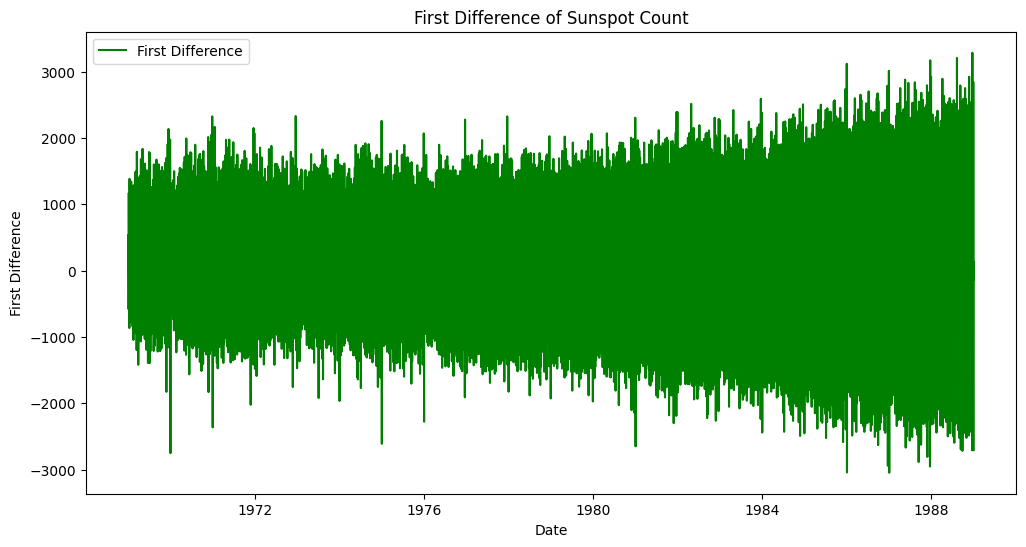

In [32]:
import matplotlib.pyplot as plt

# Calculate first difference
diff1 = df['birth_counts'].diff()

plt.figure(figsize=(12, 6))
plt.plot(df.index, diff1, label='First Difference', color='green')
plt.xlabel("Date")
plt.ylabel("First Difference")
plt.title("First Difference of Sunspot Count")
plt.legend()
plt.show()


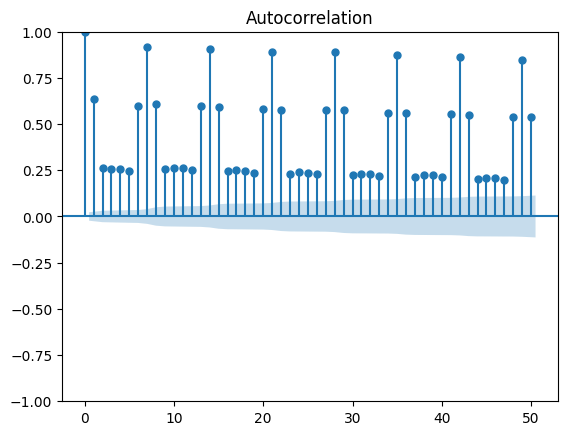

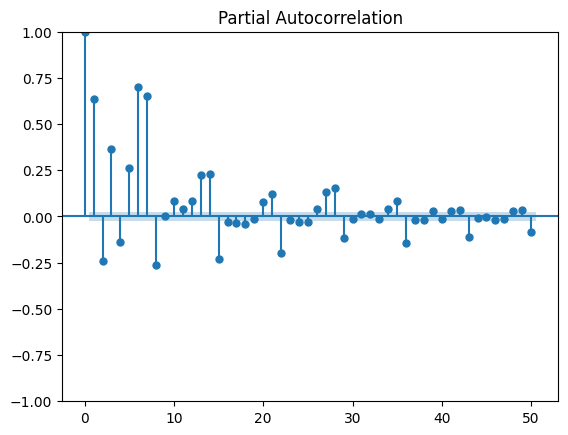

In [14]:
plot_acf(df['birth_counts'], lags=50)
plt.show()

plot_pacf(df['birth_counts'], lags=50)
plt.show()


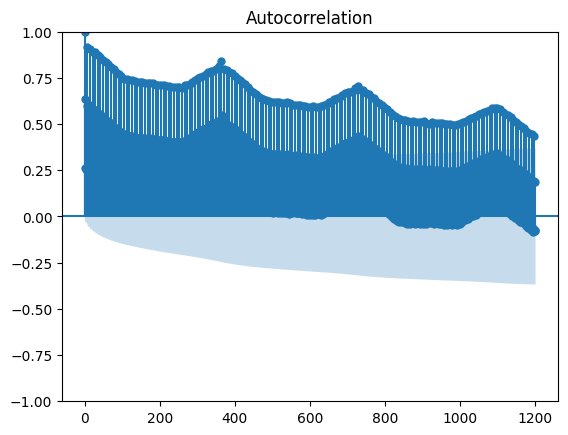

In [7]:
# ACF 플롯을 통해 반복되는 피크를 확인 (예: 365일마다 피크가 나타난다면 계절 주기는 365일)
plot_acf(df['birth_counts'], lags=1200)
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_46692\1700883742.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()


Total data points: 240, Training: 192, Testing: 48
                                     SARIMAX Results                                      
Dep. Variable:                          log_birth   No. Observations:                  192
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 485.619
Date:                            Mon, 17 Mar 2025   AIC                           -963.239
Time:                                    06:49:33   BIC                           -950.489
Sample:                                01-31-1969   HQIC                          -958.069
                                     - 12-31-1984                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0411      0.240     -0.171      0.864      -0.

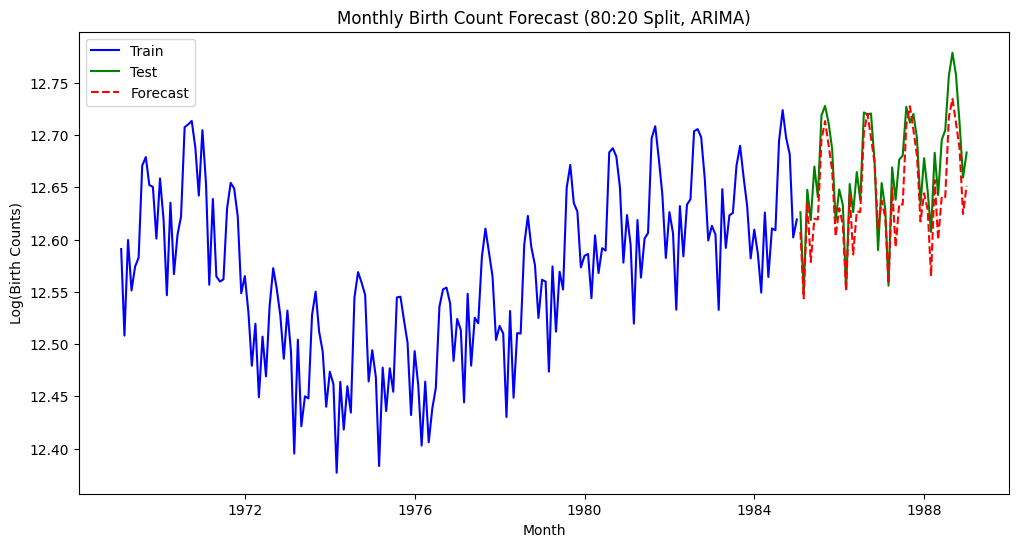

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ----------------------------
# 1. Aggregate daily ori into monthly ori using sum (for count ori)
#    (Assumes df.index is datetime and 'birth_counts' column exists)
# ----------------------------
df_monthly = df.resample('M').sum()

# ----------------------------
# 2. Apply log transformation to stabilize variance
# ----------------------------
df_monthly['log_birth'] = np.log1p(df_monthly['birth_counts'])

# For modeling, use the log-transformed series
series = df_monthly['log_birth']

# ----------------------------
# 3. Split ori into training (80%) and testing (20%)
# ----------------------------
n_total = len(series.dropna())
split_index = int(n_total * 0.8)
train = series.dropna().iloc[:split_index]
test = series.dropna().iloc[split_index:]
horizon = len(test)
print(f"Total ori points: {n_total}, Training: {len(train)}, Testing: {len(test)}")

# ----------------------------
# 4. Fit an ARIMA model using SARIMAX
#    (For this example, we assume the series has a weak trend and annual seasonality.
#     Here, seasonal_order=(0,1,1,12) is used as an example.)
# ----------------------------
start_time = time.time()  # 시작 시간 측정

model = SARIMAX(train, order=(1,1,1), seasonal_order=(0,1,1,12))
model_fit = model.fit(disp=False)
print(model_fit.summary())

# ----------------------------
# 5. Forecast for the test period
# ----------------------------
forecast = model_fit.forecast(steps=horizon)
forecast_series = pd.Series(forecast, index=test.index)

end_time = time.time()  # 종료 시간 측정
exec_time = end_time - start_time

# ----------------------------
# 6. Calculate Evaluation Metrics
# ----------------------------

# MAE & RMSE using scikit-learn functions
mae = mean_absolute_error(test, forecast_series)
rmse = np.sqrt(mean_squared_error(test, forecast_series))

# sMAPE 계산
def calc_smape(actual, forecast, eps=1e-8):
    return 100 * np.mean(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast) + eps))

smape = calc_smape(test.values, forecast_series.values)

# MASE 계산: 훈련 데이터의 naïve forecast 오차의 평균으로 스케일링
naive_forecast = train.shift(1)
scale = np.mean(np.abs(train.dropna() - naive_forecast.dropna()))
mase = mae / (scale + 1e-8)  # 0으로 나누는 경우 방지

# ----------------------------
# 7. Save the metrics to CSV
# ----------------------------
metrics_dict = {
    'sMAPE': [smape],
    'MASE': [mase],
    'MAE': [mae],
    'RMSE': [rmse],
    'Execution Time': [exec_time]
}

metrics_df = pd.DataFrame(metrics_dict)
metrics_df.to_csv("forecast_evaluation_metrics.csv", index=False)
print("Evaluation metrics saved to 'forecast_evaluation_metrics.csv'.")

# ----------------------------
# 8. Visualize the results
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red', linestyle='--')
plt.xlabel("Month")
plt.ylabel("Log(Birth Counts)")
plt.title("Monthly Birth Count Forecast (80:20 Split, ARIMA)")
plt.legend()
plt.show()


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ARIMA: SARIMAX 사용 (statsmodels)
from statsmodels.tsa.statespace.sarimax import SARIMAX
# SES, ETS: statsmodels의 HoltWinters
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
# Prophet: fbprophet (prophet) 사용
from prophet import Prophet
# TBATS: tbats 라이브러리 사용 (pip install tbats)
try:
    from tbats import TBATS
except Exception as e:
    print("TBATS library not available:", e)
# Theta: statsforecast 라이브러리 사용 (pip install statsforecast)
try:
    from statsforecast.models import Theta
    from statsforecast import StatsForecast
except Exception as e:
    print("Theta model not available:", e)

# ----------------------------
# 1. Data Preparation
# ----------------------------
# 일별 데이터를 월별 합계로 집계 (카운트 데이터의 경우 합계를 사용)
df_monthly = df.resample('M').sum()

# 로그 변환: 0값 처리를 위해 log1p 사용
df_monthly['log_birth'] = np.log1p(df_monthly['birth_counts'])

# 모델링에는 로그 변환된 데이터를 사용
series = df_monthly['log_birth']

# ----------------------------
# 2. Split Data into Training (80%) and Testing (20%)
# ----------------------------
n_total = len(series.dropna())
split_index = int(n_total * 0.8)
train = series.dropna().iloc[:split_index]
test = series.dropna().iloc[split_index:]
horizon = len(test)
print(f"Total ori points: {n_total}, Training: {len(train)}, Testing: {len(test)}")

# 실제 원본 스케일의 값 (역변환 대상)
actual_orig = np.expm1(test)

# For MASE 계산: compute scale using the naive forecast on the original training ori
train_orig = np.expm1(train)
naive_forecast = train_orig.shift(1)
scale = np.mean(np.abs(train_orig.dropna() - naive_forecast.dropna()))

# ----------------------------
# 3. Define Evaluation Functions
# ----------------------------
def calc_smape(actual, forecast, eps=1e-8):
    return 100 * np.mean(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast) + eps))

def calc_mase(actual, forecast, scale, eps=1e-8):
    mae = mean_absolute_error(actual, forecast)
    return mae / (scale + eps)

# Dictionary to store results from each model
results = []

# ----------------------------
# 4. Model 1: ARIMA using SARIMAX
# ----------------------------
start = time.time()
model_arima = SARIMAX(train, order=(1,1,1), seasonal_order=(0,1,1,12))
fit_arima = model_arima.fit(disp=False)
forecast_arima = fit_arima.forecast(steps=horizon)
end = time.time()
exec_time = end - start

# 역변환: 예측 결과를 원본 스케일로 복원
forecast_arima_orig = np.expm1(pd.Series(forecast_arima, index=test.index))
mae_arima = mean_absolute_error(actual_orig, forecast_arima_orig)
rmse_arima = np.sqrt(mean_squared_error(actual_orig, forecast_arima_orig))
smape_arima = calc_smape(actual_orig.values, forecast_arima_orig.values)
mase_arima = calc_mase(actual_orig, forecast_arima_orig, scale)

results.append({
    'Model': 'ARIMA',
    'sMAPE': smape_arima,
    'MASE': mase_arima,
    'MAE': mae_arima,
    'RMSE': rmse_arima,
    'Execution Time': exec_time
})
print("ARIMA completed.")

# ----------------------------
# 5. Model 2: SES (Simple Exponential Smoothing)
# ----------------------------
start = time.time()
model_ses = SimpleExpSmoothing(train).fit(optimized=True)
forecast_ses = model_ses.forecast(steps=horizon)
end = time.time()
exec_time = end - start

forecast_ses_orig = np.expm1(pd.Series(forecast_ses, index=test.index))
mae_ses = mean_absolute_error(actual_orig, forecast_ses_orig)
rmse_ses = np.sqrt(mean_squared_error(actual_orig, forecast_ses_orig))
smape_ses = calc_smape(actual_orig.values, forecast_ses_orig.values)
mase_ses = calc_mase(actual_orig, forecast_ses_orig, scale)

results.append({
    'Model': 'SES',
    'sMAPE': smape_ses,
    'MASE': mase_ses,
    'MAE': mae_ses,
    'RMSE': rmse_ses,
    'Execution Time': exec_time
})
print("SES completed.")

# ----------------------------
# 6. Model 3: Theta Model using statsforecast
# ----------------------------
try:
    start = time.time()
    # Prepare DataFrame for statsforecast: columns: ds, y, unique_id
    train_df = pd.DataFrame({'ds': train.index, 'y': train.values, 'unique_id': 'series'})
    sf = StatsForecast(train_df, models=[Theta()], freq='M')
    forecast_df = sf.forecast(horizon, train_df)
    # forecast_df has a column named "Theta"
    forecast_theta = forecast_df['Theta']
    forecast_theta_series = pd.Series(forecast_theta.values, index=test.index)
    end = time.time()
    exec_time = end - start

    forecast_theta_orig = np.expm1(forecast_theta_series)
    mae_theta = mean_absolute_error(actual_orig, forecast_theta_orig)
    rmse_theta = np.sqrt(mean_squared_error(actual_orig, forecast_theta_orig))
    smape_theta = calc_smape(actual_orig.values, forecast_theta_orig.values)
    mase_theta = calc_mase(actual_orig, forecast_theta_orig, scale)
    
    results.append({
        'Model': 'Theta',
        'sMAPE': smape_theta,
        'MASE': mase_theta,
        'MAE': mae_theta,
        'RMSE': rmse_theta,
        'Execution Time': exec_time
    })
    print("Theta completed.")
except Exception as e:
    print("Theta model error:", e)

# ----------------------------
# 7. Model 4: TBATS Model
# ----------------------------
try:
    start = time.time()
    estimator = TBATS(seasonal_periods=[12])  # 월별 데이터: 계절 주기 12
    model_tbats = estimator.fit(train.values)
    forecast_tbats = model_tbats.forecast(steps=horizon)
    forecast_tbats_series = pd.Series(forecast_tbats, index=test.index)
    end = time.time()
    exec_time = end - start

    forecast_tbats_orig = np.expm1(forecast_tbats_series)
    mae_tbats = mean_absolute_error(actual_orig, forecast_tbats_orig)
    rmse_tbats = np.sqrt(mean_squared_error(actual_orig, forecast_tbats_orig))
    smape_tbats = calc_smape(actual_orig.values, forecast_tbats_orig.values)
    mase_tbats = calc_mase(actual_orig, forecast_tbats_orig, scale)
    
    results.append({
        'Model': 'TBATS',
        'sMAPE': smape_tbats,
        'MASE': mase_tbats,
        'MAE': mae_tbats,
        'RMSE': rmse_tbats,
        'Execution Time': exec_time
    })
    print("TBATS completed.")
except Exception as e:
    print("TBATS model error:", e)

# ----------------------------
# 8. Model 5: ETS Model using ExponentialSmoothing (additive trend & seasonal)
# ----------------------------
start = time.time()
model_ets = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit(optimized=True)
forecast_ets = model_ets.forecast(steps=horizon)
end = time.time()
exec_time = end - start

forecast_ets_series = pd.Series(forecast_ets, index=test.index)
forecast_ets_orig = np.expm1(forecast_ets_series)
mae_ets = mean_absolute_error(actual_orig, forecast_ets_orig)
rmse_ets = np.sqrt(mean_squared_error(actual_orig, forecast_ets_orig))
smape_ets = calc_smape(actual_orig.values, forecast_ets_orig.values)
mase_ets = calc_mase(actual_orig, forecast_ets_orig, scale)

results.append({
    'Model': 'ETS',
    'sMAPE': smape_ets,
    'MASE': mase_ets,
    'MAE': mae_ets,
    'RMSE': rmse_ets,
    'Execution Time': exec_time
})
print("ETS completed.")

# ----------------------------
# 9. Model 6: Prophet Model
# ----------------------------
try:
    start = time.time()
    train_prophet = pd.DataFrame({'ds': train.index, 'y': train.values})
    model_prophet = Prophet()
    model_prophet.fit(train_prophet)
    future = model_prophet.make_future_dataframe(periods=horizon, freq='M', include_history=False)
    forecast_prophet = model_prophet.predict(future)
    forecast_prophet_series = pd.Series(forecast_prophet['yhat'].values, index=test.index)
    end = time.time()
    exec_time = end - start

    forecast_prophet_orig = np.expm1(forecast_prophet_series)
    mae_prophet = mean_absolute_error(actual_orig, forecast_prophet_orig)
    rmse_prophet = np.sqrt(mean_squared_error(actual_orig, forecast_prophet_orig))
    smape_prophet = calc_smape(actual_orig.values, forecast_prophet_orig.values)
    mase_prophet = calc_mase(actual_orig, forecast_prophet_orig, scale)
    
    results.append({
        'Model': 'Prophet',
        'sMAPE': smape_prophet,
        'MASE': mase_prophet,
        'MAE': mae_prophet,
        'RMSE': rmse_prophet,
        'Execution Time': exec_time
    })
    print("Prophet completed.")
except Exception as e:
    print("Prophet model error:", e)

# ----------------------------
# 10. Save Evaluation Metrics to CSV
# ----------------------------
results_df = pd.DataFrame(results)
results_df.to_csv("forecast_evaluation_metrics.csv", index=False)
print("Evaluation metrics saved to 'forecast_evaluation_metrics.csv'.")
print(results_df)


C:\Users\admin\AppData\Local\Temp\ipykernel_46692\417985152.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()


Total data points: 240, Training: 192, Testing: 48
ARIMA completed.
SES completed.
Theta model error: _StatsForecast.__init__() got multiple values for argument 'models'


C:\Users\admin\Desktop\SNU review\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\admin\Desktop\SNU review\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\admin\Desktop\SNU review\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\admin\Desktop\SNU review\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\admin\Desktop\SNU review\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

TBATS completed.
ETS completed.


06:24:04 - cmdstanpy - INFO - Chain [1] done processing


Prophet completed.
Evaluation metrics saved to 'forecast_evaluation_metrics.csv'.
     Model     sMAPE      MASE           MAE          RMSE  Execution Time
0    ARIMA  2.511903  0.634630   7924.906257   9282.860514        0.279550
1      SES  5.501949  1.387732  17329.214536  21330.557192        0.007003
2    TBATS  5.788785  1.437943  17956.222266  19553.857286       32.721005
3      ETS  5.620440  1.396980  17444.698599  19051.247405        0.062992
4  Prophet  4.066424  1.019272  12728.093323  14671.417363        0.266965


C:\Users\admin\Desktop\SNU review\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [20]:
import os
import glob
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 모델 관련 라이브러리
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.forecasting.theta import ThetaModel
from tbats import TBATS
from prophet import Prophet
from pmdarima import auto_arima  # auto_arima 추가

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", message="No frequency information was provided, so inferred frequency D will be used.")
warnings.filterwarnings("ignore", message="Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.")
warnings.filterwarnings("ignore", message="Non-invertible starting MA parameters found. Using zeros as starting parameters.")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="Mean of empty slice")

import logging
logging.getLogger("cmdstanpy").setLevel(logging.ERROR)

from tqdm import tqdm

# ----------------------------
# 1. 데이터 전처리 (로그 변환 + 스무딩 + Min–Max Scaling)
# ----------------------------
def transform_train_test(series, window=30):
    """
    series: 원본 시계열 (pandas Series)
    window: 이동평균 윈도우 (일 단위, 예: 30일)
    
    반환:
      - train_scaled, test_scaled: 변환된 값 (로그 변환+스무딩+Min–Max Scaling)
      - train_original, test_original: 원본 값 (평가 시 사용)
      - scale_min, scale_max: 스무딩된 로그 시계열의 최소/최대 (역변환에 필요)
    """
    # 80:20 Train/Test 분할
    split_index = int(len(series) * 0.8)
    train_original = series.iloc[:split_index]
    test_original = series.iloc[split_index:]
    
    # 학습 데이터: 로그 변환 + 스무딩
    train_log = np.log1p(train_original)
    train_smoothed = train_log.rolling(window=window, min_periods=1).mean()
    scale_min = train_smoothed.min()
    scale_max = train_smoothed.max()
    train_scaled = (train_smoothed - scale_min) / (scale_max - scale_min)
    
    # 테스트 데이터에도 동일한 변환 적용 (학습 데이터의 scale_min, scale_max 사용)
    test_log = np.log1p(test_original)
    test_smoothed = test_log.rolling(window=window, min_periods=1).mean()
    test_scaled = (test_smoothed - scale_min) / (scale_max - scale_min)
    
    return train_scaled, test_scaled, train_original, test_original, scale_min, scale_max

# ----------------------------
# 2. 예측 결과 시각화 함수 (옵션)
# ----------------------------
def plot_forecast(train, test, forecast, model_name, file_name):
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(forecast.index, forecast, label=f'{model_name} Forecast', color='red')
    plt.xlabel("Date")
    plt.ylabel("Birth Counts")
    plt.title(f"{file_name} - {model_name} Forecast vs Test Data")
    plt.legend()
    plt.show()

# ----------------------------
# 3. 평가 지표 계산 함수 (sMAPE, MASE, MAE, RMSE)
# ----------------------------
def calculate_metrics(actual, forecast, train):
    actual = actual.reindex(forecast.index)
    error = forecast - actual
    mae = np.mean(np.abs(error))
    rmse = np.sqrt(np.mean(error**2))
    
    denom = np.abs(forecast) + np.abs(actual)
    denom = denom.replace(0, np.nan)
    smape = np.nanmean(2 * np.abs(error) / denom) * 100
    
    if len(train) > 1:
        naive_errors = np.abs(train.diff().dropna())
        scale = np.mean(naive_errors)
    else:
        scale = np.nan
    mase = mae / scale if scale != 0 else np.nan
    
    return {"sMAPE": smape, "MASE": mase, "MAE": mae, "RMSE": rmse}

# ----------------------------
# 4. Birth Counts 데이터셋 모델 예측 및 평가 (일간 데이터, 계절 주기 365일)
# ----------------------------
def process_birth_data(df, window=30, seasonal_period=365):
    """
    df: Birth Counts 데이터셋 (인덱스: Date, 컬럼: 'birth_counts')
    window: 이동평균 윈도우 (일 단위, 예: 30일)
    seasonal_period: 계절 주기 (일 단위, 여기서는 365일)
    """
    series = df['birth_counts'].interpolate()
    train_scaled, test_scaled, train_original, test_original, scale_min, scale_max = transform_train_test(series, window=window)
    horizon = len(test_original)
    forecasts = {}
    model_times = {}
    
    # Helper: 인버스 변환 함수 (스케일 복원 후 역 로그 변환)
    def inverse_transform(scaled_pred):
        log_pred = scaled_pred * (scale_max - scale_min) + scale_min
        return np.expm1(log_pred)
    
    # tqdm 진행 바 생성 (총 6개 모델)
    pbar = tqdm(total=6, desc="모델 실행 진행도", unit="모델")
    
    # 4-1. SES
    start = time.time()
    ses_model = SimpleExpSmoothing(train_scaled, initialization_method="estimated").fit()
    ses_forecast_scaled = ses_model.forecast(horizon)
    model_times["SES"] = time.time() - start
    ses_forecast = pd.Series(inverse_transform(ses_forecast_scaled), index=test_original.index)
    forecasts["SES"] = ses_forecast
    pbar.update(1)
    
    # 4-2. Theta 모델 (일간 데이터)
    start = time.time()
    train_scaled_freq = train_scaled.asfreq('D')
    theta_model = ThetaModel(train_scaled_freq).fit()
    theta_forecast_scaled = theta_model.forecast(horizon)
    model_times["Theta"] = time.time() - start
    theta_forecast = pd.Series(inverse_transform(theta_forecast_scaled), index=test_original.index)
    forecasts["Theta"] = theta_forecast
    pbar.update(1)
    
    # 4-3. TBATS 모델 (계절 주기 365일)
    start = time.time()
    tbats_estimator = TBATS(seasonal_periods=[seasonal_period])
    tbats_model = tbats_estimator.fit(train_scaled)
    tbats_forecast_scaled = tbats_model.forecast(steps=horizon)
    forecast_index = pd.date_range(start=train_scaled.index[-1] + pd.Timedelta(days=1), periods=horizon, freq='D')
    tbats_forecast_scaled_series = pd.Series(tbats_forecast_scaled, index=forecast_index)
    model_times["TBATS"] = time.time() - start
    tbats_forecast = pd.Series(inverse_transform(tbats_forecast_scaled_series), index=test_original.index)
    forecasts["TBATS"] = tbats_forecast
    pbar.update(1)
    
    # 4-4. ETS (추세만 고려하는 지수평활)
    start = time.time()
    ets_model = ExponentialSmoothing(train_scaled, trend="add", seasonal=None, initialization_method="estimated").fit()
    ets_forecast_scaled = ets_model.forecast(horizon)
    model_times["ETS"] = time.time() - start
    ets_forecast = pd.Series(inverse_transform(ets_forecast_scaled), index=test_original.index)
    forecasts["ETS"] = ets_forecast
    pbar.update(1)
    
    # 4-5. Auto ARIMA 모델 (최적 모형 자동 선택)
    start = time.time()
    auto_arima_model = auto_arima(train_scaled, seasonal=False, stepwise=True, suppress_warnings=True, error_action='ignore')
    arima_forecast_scaled = auto_arima_model.predict(n_periods=horizon)
    model_times["ARIMA"] = time.time() - start
    arima_forecast = pd.Series(inverse_transform(arima_forecast_scaled), index=test_original.index)
    forecasts["ARIMA"] = arima_forecast
    pbar.update(1)
    
    # 4-6. Prophet (일간 데이터, 연간 계절성 대신 긴 주기 활성화)
    start = time.time()
    # Prophet은 인덱스 재설정을 통해 올바른 시계열 구조를 유지합니다.
    prophet_train = train_scaled.reset_index()
    prophet_train.columns = ['ds', 'y']
    prophet_train['ds'] = pd.to_datetime(prophet_train['ds']).dt.tz_localize(None)
    prophet_model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
    prophet_model.add_seasonality(name='long_cycle', period=seasonal_period, fourier_order=5)
    prophet_model.fit(prophet_train)
    future_df = prophet_model.make_future_dataframe(periods=horizon, freq='D')
    prophet_forecast_df = prophet_model.predict(future_df)
    prophet_forecast_scaled = prophet_forecast_df.set_index('ds')['yhat'].iloc[-horizon:]
    model_times["Prophet"] = time.time() - start
    prophet_forecast = pd.Series(inverse_transform(prophet_forecast_scaled), index=test_original.index)
    forecasts["Prophet"] = prophet_forecast
    pbar.update(1)
    
    pbar.close()
    
    # 평가 지표 계산 (원본 스케일: 실제 시계열 vs 예측 결과)
    metrics = {}
    for model_name, forecast in forecasts.items():
        metrics[model_name] = calculate_metrics(test_original, forecast, train_original)
        metrics[model_name]["Execution Time"] = model_times.get(model_name, np.nan)
    
    return metrics

# ----------------------------
# 5. 데이터 로드 및 파이프라인 실행, 평가 지표 CSV 저장
# ----------------------------
df = pd.read_csv("../data/Processed_us_birth.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 대상 칼럼은 'birth_counts'라고 가정
birth_metrics = process_birth_data(df, window=30, seasonal_period=365)
print("Birth Counts 데이터셋 평가 지표:")
print(birth_metrics)

# 평가 지표를 DataFrame으로 변환하여 CSV 파일로 저장
birth_metrics_df = pd.DataFrame.from_dict(birth_metrics, orient='index')
birth_metrics_df.to_csv("birth_aggregate_metrics.csv", index=True)
print("\nAggregate metrics across Birth Counts ori:")
print(birth_metrics_df)


모델 실행 진행도: 100%|██████████| 6/6 [18:55<00:00, 189.33s/모델]

Birth Counts 데이터셋 평가 지표:
{'SES': {'sMAPE': 12.368929611604337, 'MASE': 1.9761043442839836, 'MAE': 1262.2511079741566, 'RMSE': 1381.455782584673, 'Execution Time': 0.060585975646972656}, 'Theta': {'sMAPE': 11.787998072665298, 'MASE': 1.8866190398767924, 'MAE': 1205.0917150695734, 'RMSE': 1315.6420773532268, 'Execution Time': 0.2351701259613037}, 'TBATS': {'sMAPE': 24.831233967962675, 'MASE': 3.654039493503849, 'MAE': 2334.0444610619857, 'RMSE': 2714.935939126283, 'Execution Time': 943.4261662960052}, 'ETS': {'sMAPE': 11.67042518754208, 'MASE': 1.8678751851255213, 'MAE': 1193.1189407087786, 'RMSE': 1292.4589785477358, 'Execution Time': 0.16451430320739746}, 'ARIMA': {'sMAPE': 12.21769936236894, 'MASE': 1.9529035203847114, 'MAE': 1247.4314119608973, 'RMSE': 1364.269608873673, 'Execution Time': 182.810364484787}, 'Prophet': {'sMAPE': 11.412394298177457, 'MASE': 1.823762272476625, 'MAE': 1164.9414950045073, 'RMSE': 1239.9993288856122, 'Execution Time': 9.256306409835815}}

Aggregate metrics